In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from spacy.language import Language
from textblob import TextBlob
!pip install googletrans==3.1.0a0
from googletrans import Translator

# generate country code  based on country name 
!pip install pycountry

!pip install geopandas
from shapely.geometry import Point 
import folium
import geopandas as gpd
!pip install mapclassify
import mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 1.7 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 1.4 MB 16.8 MB/s 
     |████████████████████████████████| 53 kB 1.2 MB/s 
     |████████████████████████████████| 65 kB 1.8 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=d9db887884e329878debed7c27fe54a72b68dbdf31cca231c389ccea5534278f
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 7.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filen

In [2]:
path = "/content/cleaned_license1.csv"
license1 = pd.read_csv(path)

In [3]:
license1.head()

,Unnamed: 0,location,dates,license,description,tags,views,comments
0,0,Spain,2022-10-12 11:38:56,1.0,#UCLGCongress,[],0.0,0.0
1,1,"Katy, Texas, united states",2022-10-13 18:44:40,1.0,NaN,[],40.0,0.0
2,2,NaN,2022-10-15 16:33:21,1.0,Dado que el Día Mundial de la Alimentación es ...,[],9.0,0.0
3,3,NaN,2022-10-05 16:11:46,1.0,Milkman 730,"['Edinburgh', 'Scotland', 'ScotlandisNow', 'Sc...",143.0,0.0
4,4,"Dallas, USA",2022-10-15 18:21:50,1.0,NaN,[],22.0,0.0


In [ ]:
license1.shape

## Map:

In [4]:
Country = []
for row in license1["location"][0:]:
  location_list = str(row).split(",")
  country = location_list[len(location_list) - 1]
  country = country.rstrip() # remove the last whitespace
  country = country.lstrip() # remove the first whitespace
  country = country.title()
  if country == "Usa":
    country = "United States"
  if country == "Uk":
    country = "United Kingdom"
  Country.append(country)
print(Country)

['Spain', 'United States', 'Nan', 'Nan', 'United States', 'Portugal', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Taiwan', 'United States', 'Nan', 'Nan', 'Nan', 'Nan', 'United States', 'Nan', 'España', 'Nan', 'Indonesia', 'Nan', 'Nan', 'The Netherlands', 'United States', 'Nan', 'Nan', 'Nan', 'Canada', 'Nan', 'Brasilia', 'Nan', 'Nan', 'Nan', 'Russia', 'Il', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', '台灣', 'Nan', 'Nan', 'Russia', 'Nan', 'United States', 'Nan', 'Nan', 'Spain', 'Nan', 'Nan', 'United States', 'Nan', 'United States', 'United States', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Switzerland', 'Nan', 'Nan', 'Nan', 'Nan', 'Canada', 'Nan', 'Nan', 'Nan', 'Brazil', 'Brazil', 'Nan', 'Nan', 'United States', 'Brasil', 'Nan', 'Nan', 'Nan', 'Nan', 'United States', 'Nan', 'Brasil', 'Nan', 'Nan', 'Nan', 'Belgique', 'Nan', 'Nan', 'Nan', 'Nan', 'Germany', 'Nan', 'Nan', 'United States', 'Nan', 'España', 'Nan', 'United Kingdom', 'Nan', 'Nan', 'Nan', 'Nicaragua', 'United States', 'United S

In [5]:
license1["country"] = Country

Let's check some random:

In [6]:
license1["country"][1]

'United States'

In [7]:
license1["country"][1000]

'Philadelphia'

In [8]:
license1.head()

,Unnamed: 0,location,dates,license,description,tags,views,comments,country
0,0,Spain,2022-10-12 11:38:56,1.0,#UCLGCongress,[],0.0,0.0,Spain
1,1,"Katy, Texas, united states",2022-10-13 18:44:40,1.0,NaN,[],40.0,0.0,United States
2,2,NaN,2022-10-15 16:33:21,1.0,Dado que el Día Mundial de la Alimentación es ...,[],9.0,0.0,Nan
3,3,NaN,2022-10-05 16:11:46,1.0,Milkman 730,"['Edinburgh', 'Scotland', 'ScotlandisNow', 'Sc...",143.0,0.0,Nan
4,4,"Dallas, USA",2022-10-15 18:21:50,1.0,NaN,[],22.0,0.0,United States


Source: https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b

In [9]:
import pycountry
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

In [10]:
# Translate the locations with non-English names to English first:
def translate(df):
  text1 = []
  translator = Translator()
  for row in df["country"][0:]:
    # print(translator.detect(row).lang)
    if translator.detect(row).lang != "en" and row != "nan" and row != "":
      text1.append(translator.translate(row, dest='en').text)
    else:
      text1.append(row)
  df["country"] = text1

In [11]:
translate(license1)

In [12]:
license1["Alpha-3 code"] = alpha3code(license1.country)

In [13]:
url = "https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv"
map_df = pd.read_csv(url)

In [14]:
for col in map_df.columns:
    map_df[col] = map_df[col].str.extract(r'"(.*)"')

In [15]:
map_df

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,NaN,AF,AFG,4,33,65
1,NaN,AL,ALB,8,41,20
2,NaN,DZ,DZA,12,28,3
3,NaN,AS,ASM,16,-14.3333,-170
4,NaN,AD,AND,20,42.5,1.6
...,...,...,...,...,...,...
251,NaN,WF,WLF,876,-13.3,-176.2
252,NaN,EH,ESH,732,24.5,-13
253,NaN,YE,YEM,887,15,48
254,NaN,ZM,ZMB,894,-15,30


In [16]:
merged2 = pd.merge(license1, map_df, on="Alpha-3 code")
merged2.head()

,Unnamed: 0,location,dates,license,description,tags,views,comments,country,Alpha-3 code,Country,Alpha-2 code,Numeric code,Latitude (average),Longitude (average)
0,0,Spain,2022-10-12 11:38:56,1.0,#UCLGCongress,[],0.0,0.0,Spain,ESP,NaN,ES,724,40,-4
1,20,"Valladolid, España",2022-10-08 14:32:11,1.0,Fotografía Enrique,[],86.0,0.0,spain,ESP,NaN,ES,724,40,-4
2,53,"Getxo, Spain",2022-09-23 13:03:49,1.0,Fotos de Gorka Retes. Post completo: <b><a hre...,[],5.0,0.0,Spain,ESP,NaN,ES,724,40,-4
3,101,"Barcelona, España",2022-09-08 18:38:27,1.0,NaN,[],56.0,0.0,spain,ESP,NaN,ES,724,40,-4
4,576,"Toledo, España",2019-10-20 10:17:00,1.0,NaN,"['Carrera Solidaria', 'CNP', 'Cuerpo Nacional ...",57.0,0.0,spain,ESP,NaN,ES,724,40,-4


In [107]:
merged2.shape

(944, 15)

In [17]:
merged2_grouped = merged2.groupby("Alpha-3 code")["Alpha-3 code"].count()

In [110]:
merged2_grouped.shape

(47,)

In [18]:
merged2_grouped

Alpha-3 code
ARG      5
AUS     44
AUT     20
BEL     14
BRA     41
CAN     76
CHE     22
CHL      9
CHN      1
COL      6
CRI      6
DEU     22
DNK      2
ECU      1
ESP     51
FIN      6
FRA     53
GBR     67
GRC      3
HKG      3
HRV      1
HUN      2
IDN      2
IND      4
ISR      1
ITA     15
JPN     34
KEN      1
LKA      1
LTU      1
LVA      5
MEX      5
MYS      1
NGA      4
NIC      3
NLD     22
NOR      2
NZL      7
PER     26
PRT      7
ROU      3
SGP     12
SRB      1
SWE     16
THA      2
UKR      1
USA    313
Name: Alpha-3 code, dtype: int64

In [21]:
merged_for_map = pd.DataFrame()

In [22]:
merged_for_map["Alpha-3 code"] = list(merged2_grouped.index)
merged_for_map["Count"] = list(merged2_grouped)

In [111]:
merged_for_map.shape

(47, 2)

In [23]:
# merged_for_map2 = merged_for_map.merge(map_df, on="Alpha-3 code")
merged_for_map2 = merged_for_map.set_index("Alpha-3 code").join(map_df.set_index("Alpha-3 code"))

In [24]:
merged_for_map2.head()

,Count,Country,Alpha-2 code,Numeric code,Latitude (average),Longitude (average)
Alpha-3 code,,,,,,
ARG,5,NaN,AR,32,-34,-64
AUS,44,NaN,AU,36,-27,133
AUT,20,NaN,AT,40,47.3333,13.3333
BEL,14,NaN,BE,56,50.8333,4
BRA,41,NaN,BR,76,-10,-55


In [116]:
merged_for_map2["Alpha-3 code"] = list(merged_for_map2.index)
merged_for_map2.reset_index(drop=True, inplace=True)

In [117]:
merged_for_map2.shape

(47, 7)

In [113]:
geometry_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [114]:
geometry_data.head(1)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."


In [118]:
new = merged_for_map2.set_index("Alpha-3 code").join(geometry_data.set_index("iso_a3"))

In [120]:
new.shape

(47, 11)

In [119]:
new.head()

,Count,Country,Alpha-2 code,Numeric code,Latitude (average),Longitude (average),pop_est,continent,name,gdp_md_est,geometry
ARG,5,NaN,AR,32,-34,-64,44293293.0,South America,Argentina,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
AUS,44,NaN,AU,36,-27,133,23232413.0,Oceania,Australia,1189000.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."
AUT,20,NaN,AT,40,47.3333,13.3333,8754413.0,Europe,Austria,416600.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
BEL,14,NaN,BE,56,50.8333,4,11491346.0,Europe,Belgium,508600.0,"POLYGON ((6.15666 50.80372, 6.04307 50.12805, ..."
BRA,41,NaN,BR,76,-10,-55,207353391.0,South America,Brazil,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."


In [108]:
geometry_data.shape

(177, 6)

In [121]:
# plot world map
from geopandas import GeoDataFrame

new_geo = GeoDataFrame(new) 

In [142]:
new_geo = new_geo.sort_values(by='Count',ascending=False)

In [143]:
new_geo.head()

,Count,Country,Alpha-2 code,Numeric code,Latitude (average),Longitude (average),pop_est,continent,name,gdp_md_est,geometry
USA,313,NaN,US,840,38,-97,326625791.0,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
CAN,76,NaN,CA,124,60,-95,35623680.0,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
GBR,67,NaN,GB,826,54,-2,64769452.0,Europe,United Kingdom,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54..."
FRA,53,NaN,FR,250,46,2,NaN,NaN,NaN,NaN,None
ESP,51,NaN,ES,724,40,-4,48958159.0,Europe,Spain,1690000.0,"POLYGON ((-7.45373 37.09779, -7.53711 37.42890..."


In [134]:
!pip install mapclassify
import mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


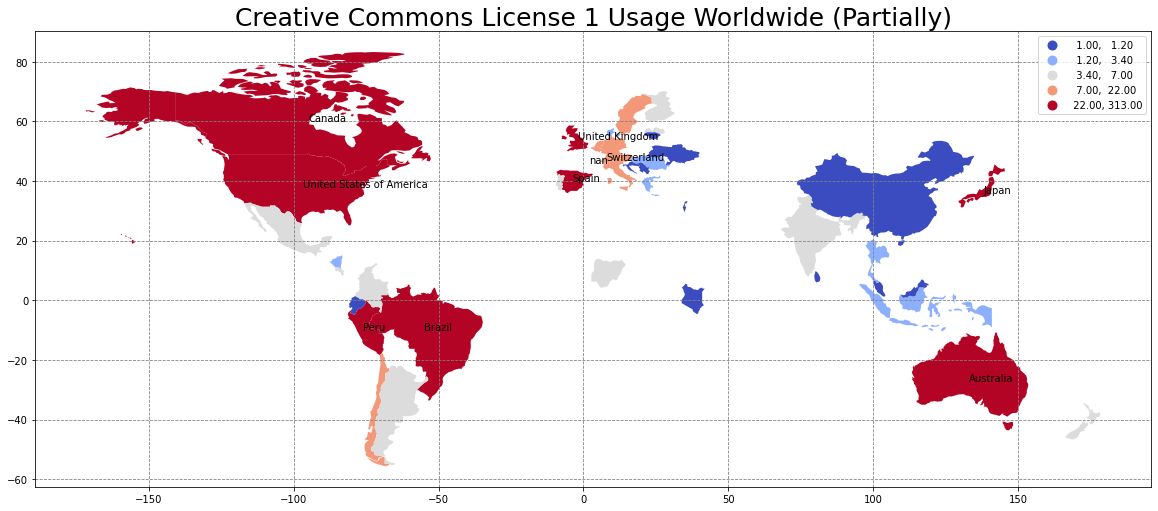

In [145]:
new_geo.plot(column='Count', legend=True, scheme="quantiles",
            figsize=(20, 20), cmap='coolwarm')
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(new_geo["Longitude (average)"][i]),float(new_geo["Latitude (average)"][i]), new_geo["name"][i], size=10)
    # "{}\n{}".format(final_for_map_geo["country"][i],final_for_map_geo["Count"][i])
plt.grid(color='gray', linestyle='dashed')
plt.title('Creative Commons License 1 Usage Worldwide (Partially)',fontsize=25)
plt.show()

In [ ]:
coun = []
for country in license1["country"]:
  if country != "In":
    coun.append(country)
print(coun)

In [ ]:
# list(pycountry.countries)

In [ ]:
license1.head()

In [165]:
merged2.shape

(944, 15)

In [42]:
count = 0
a = []
for country in license1["country"]:
  if country != "nan":
    count += 1

In [69]:
license1.shape

(3402, 10)

In [44]:
count

1412

In [ ]:
# Plot overlayed maps
fig, ax = plt.subplots(figsize=(12,12))
license1.plot(ax=ax)
cities.plot(markersize=0.5, color='red',ax=ax)
plt.tight_layout()
plt.savefig('overlay_map.png')
plt.show()

## EDA and Cleaning:

In [ ]:
path = "/content/license1.csv"
license1_raw = pd.read_csv(path)

In [ ]:
for col in license1_raw.columns:  # to get the column list
  if "Unnamed" in col:
    license1_raw = license1_raw.drop(col, axis=1)

In [ ]:
license1_raw.head()

,id,dateuploaded,isfavorite,license,realname,location,title,description,dates,views,comments,tags
0,5.244026e+10,1.666246e+09,0.0,1.0,UCLG,Spain,NaN,#UCLGCongress,2022-10-12 11:38:56,0.0,0.0,[]
1,5.244050e+10,1.666211e+09,0.0,1.0,Qui Le,"Katy, Texas, united states",Valentino Oct 13 2022,NaN,2022-10-13 18:44:40,40.0,0.0,[]
2,5.244023e+10,1.666203e+09,0.0,1.0,NaN,NaN,Día mundial de la alimentación en América Lati...,Dado que el Día Mundial de la Alimentación es ...,2022-10-15 16:33:21,9.0,0.0,[]
3,5.243891e+10,1.666172e+09,0.0,1.0,NaN,NaN,L1008730,Milkman 730,2022-10-05 16:11:46,143.0,0.0,"['Edinburgh', 'Scotland', 'ScotlandisNow', 'Sc..."
4,5.243849e+10,1.666151e+09,0.0,1.0,Jan Xie,"Dallas, USA",I30A3278,NaN,2022-10-15 18:21:50,22.0,0.0,[]


In [ ]:
license1_raw.shape

(61930, 12)

In [ ]:
count = 0
for arr in pd.unique(license1_raw["id"]):
  count += 1

In [ ]:
count

3402

In [ ]:
new_license1 = license1.dropna()

In [ ]:
new_license1.shape

(10720, 8)

In [ ]:
license1_raw.shape

(61930, 12)

In [ ]:
new_license1_raw = license1_raw.drop_duplicates(subset="id")

In [ ]:
new_license1_raw.shape

(3402, 12)

In [ ]:
new_license1_raw

,id,dateuploaded,isfavorite,license,realname,location,title,description,dates,views,comments,tags
0,5.244026e+10,1.666246e+09,0.0,1.0,UCLG,Spain,NaN,#UCLGCongress,2022-10-12 11:38:56,0.0,0.0,[]
1,5.244050e+10,1.666211e+09,0.0,1.0,Qui Le,"Katy, Texas, united states",Valentino Oct 13 2022,NaN,2022-10-13 18:44:40,40.0,0.0,[]
2,5.244023e+10,1.666203e+09,0.0,1.0,NaN,NaN,Día mundial de la alimentación en América Lati...,Dado que el Día Mundial de la Alimentación es ...,2022-10-15 16:33:21,9.0,0.0,[]
3,5.243891e+10,1.666172e+09,0.0,1.0,NaN,NaN,L1008730,Milkman 730,2022-10-05 16:11:46,143.0,0.0,"['Edinburgh', 'Scotland', 'ScotlandisNow', 'Sc..."
4,5.243849e+10,1.666151e+09,0.0,1.0,Jan Xie,"Dallas, USA",I30A3278,NaN,2022-10-15 18:21:50,22.0,0.0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
61799,5.223885e+10,1.658687e+09,0.0,1.0,NaN,NaN,2022-07-19 15.49.31,NaN,2022-07-19 16:49:31,18.0,0.0,[]
61807,5.242332e+10,1.665588e+09,0.0,1.0,Sri Sainathuni Sarath Babuji Sannidhanam,NaN,IMG_4934,NaN,2022-10-12 08:53:30,1.0,0.0,[]
61836,5.239369e+10,1.664482e+09,0.0,1.0,Câmara de Vereadores Itajaí,Brasil,20220929_0034©Davi Spuldaro-CVI,NaN,2022-09-29 16:21:18,20.0,0.0,"['19ª Legislatura', 'Câmara Municipal', 'Câmar..."
61846,5.238501e+10,1.664171e+09,0.0,1.0,Gabis-Schlager.Club / Eventfotografie,NaN,DSC_2397,NaN,2022-09-24 23:21:16,10.0,0.0,[]


In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(new_license1_raw["Dates"], new_license1_raw["Counts"])
plt.xticks(rotation=60)



---



---



## NLP and SVM:

In [4]:
# Load the large English NLP model
nlp = spacy.load("en_core_web_sm")

In [ ]:
text = "London is the capital and most populous city of England and the United Kingdom. Standing on the River Thames in the south east of the island of Great Britain, London has been a major settlement for two millennia. It was founded by the Romans, who named it Londinium."

In [ ]:
# Parse the text with spaCy. This runs the entire pipeline.
doc = nlp(text)
print(doc)

London is the capital and most populous city of England and the United Kingdom. Standing on the River Thames in the south east of the island of Great Britain, London has been a major settlement for two millennia. It was founded by the Romans, who named it Londinium.


In [ ]:
for entity in doc.ents:
    print(f"{entity.text} ({entity.label_})")

London (GPE)
England (GPE)
the United Kingdom (GPE)
the south east (LOC)
Great Britain (GPE)
London (GPE)
two (CARDINAL)
Romans (NORP)
Londinium (ORG)


In [ ]:
license1

,Unnamed: 0,location,dates,license,description,tags,views,comments
0,0,Spain,2022-10-12 11:38:56,1.0,#UCLGCongress,[],0.0,0.0
1,1,"Katy, Texas, united states",2022-10-13 18:44:40,1.0,NaN,[],40.0,0.0
2,2,NaN,2022-10-15 16:33:21,1.0,Dado que el Día Mundial de la Alimentación es ...,[],9.0,0.0
3,3,NaN,2022-10-05 16:11:46,1.0,Milkman 730,"['Edinburgh', 'Scotland', 'ScotlandisNow', 'Sc...",143.0,0.0
4,4,"Dallas, USA",2022-10-15 18:21:50,1.0,NaN,[],22.0,0.0
...,...,...,...,...,...,...,...,...
3397,3397,NaN,2022-07-19 16:49:31,1.0,NaN,[],18.0,0.0
3398,3398,NaN,2022-10-12 08:53:30,1.0,NaN,[],1.0,0.0
3399,3399,Brasil,2022-09-29 16:21:18,1.0,NaN,"['19ª Legislatura', 'Câmara Municipal', 'Câmar...",20.0,0.0
3400,3400,NaN,2022-09-24 23:21:16,1.0,NaN,[],10.0,0.0


In [5]:
text1 = ""
translator = Translator()
for row in license1["description"][0:]:
  if type(row) != float and row != "nan" and row != "":
    text1 += translator.translate(row, dest='en').text
    text1 += " "

In [ ]:
text1

'#UCLGCongress Since World Food Day is a date to raise awareness about the importance of healthy diets, in Venezuela it was celebrated not only on October 16, but for a whole week. This is how, on the 14th, the Obelisk in Plaza Francia de Altamira was lit, one of the most emblematic, well-known and visited squares in Caracas. Staff from FAO Venezuela, from the Mayor\'s Office of Chacao (municipality where the plaza is located) and other passers-by were present there. The act was headed by Alexis Bonte, Representative of the FAO Venezuela and the Secretary of Government of the mayor\'s office, José Manuel Muñoz. The act was enlivened by a musical group, who delighted the attendees with a wide repertoire of traditional and universal songs.\n\nOn October 16, it was the turn of Mérida, in this Andean city the FAO lit the Plaza de Las Banderas, where personnel from FAO Venezuela and the Libertador Municipality were present, which is where this square is located.\n\n\nPhoto: ©FAO Milkman 730

In [6]:
doc = nlp(text1)

In [ ]:
for entity in doc.ents:
    print(f"{entity.text} ({entity.label_})")

Streaming output truncated to the last 5000 lines.
1476 (DATE)
un (ORG)
La (GPE)
Edad Moderna (PERSON)
1824 (CARDINAL)
un (ORG)
clausurado (GPE)
1837.​ (CARDINAL)
La (PERSON)
los siglos XVI (ORG)
XVII (ORG)
el siglo XVI (ORG)
el siglo (ORG)
el siglo XVIII (ORG)
de Imón (ORG)
Pastor de Togneri (ORG)
Edad Media (PERSON)
las relaciones (GPE)
el catastro del marqués de la Ensenada​ (ORG)
un (ORG)
de renovación (PERSON)
el reinado de Carlos III (ORG)
​ El (PERSON)
del territorio (GPE)
Corona (GPE)
1796 (DATE)
el obispo (GPE)
Juan Díaz de la Guerra (ORG)
un (ORG)
el marqués de Brioso (ORG)
La (GPE)
de los (PERSON)
el 25 de febrero de 1805.​ El (ORG)
Sigüenza (NORP)
1862 (DATE)
ya contaba (PERSON)
1860.​ (CARDINAL)
Esta llegada (PERSON)
Guerra Civil


En 1936 (ORG)
Guerra Civil el bando republicano (ORG)
el 25 de julio—​ mantuvo (FAC)
Feliciano Benito (PERSON)
700 (CARDINAL)
de la CNT y (PERSON)
un (ORG)
del POUM.​ (PERSON)
Nieto Martín (PERSON)
el día 27 de julio.​ En agosto de 1936 (ORG)
co

Reference: https://medium.com/@ageitgey/natural-language-processing-is-fun-9a0bff37854e 

In [ ]:
# Replace a token with "REDACTED" if it is a name
def replace_name_with_placeholder(token):
  if token.ent_iob != 0 and token.ent_type_ == "PERSON":
    return "[REDACTED]"
  else:
    return token.text

# Loop through all the entities in a document and check if they are names
def scrub(text):
  doc = nlp(text)
  with doc.retokenize() as retokenizer:
    for ent in doc.ents:
      retokenizer.merge(ent)
  tokens = map(replace_name_with_placeholder, doc)
  return "".join(tokens)

In [ ]:
text1

'#UCLGCongress Since World Food Day is a date to raise awareness about the importance of healthy diets, in Venezuela it was celebrated not only on October 16, but for a whole week. This is how, on the 14th, the Obelisk in Plaza Francia de Altamira was lit, one of the most emblematic, well-known and visited squares in Caracas. Staff from FAO Venezuela, the Chacao Mayor\'s Office (municipality where the plaza is located) and other passers-by were present there. The act was headed by Alexis Bonte, Representative of the FAO Venezuela and the Secretary of Government of the mayor\'s office, José Manuel Muñoz. The act was enlivened by a musical group, who delighted the attendees with a wide repertoire of traditional and universal songs.\n\nOn October 16, it was the turn of Mérida, in this Andean city the FAO lit the Plaza de Las Banderas, where personnel from FAO Venezuela and the Libertador Municipality were present, which is where this square is located.\n\n\nPhoto: ©FAO Milkman 730 Colorid

In [ ]:
cleaned_doc = scrub(text1)

AttributeError: ignored

In [ ]:
text1

'#UCLGCongress Since World Food Day is a date to raise awareness about the importance of healthy diets, in Venezuela it was celebrated not only on October 16, but for a whole week. This is how, on the 14th, the Obelisk in Plaza Francia de Altamira was lit, one of the most emblematic, well-known and visited squares in Caracas. Staff from FAO Venezuela, the Chacao Mayor\'s Office (municipality where the plaza is located) and other passers-by were present there. The act was headed by Alexis Bonte, Representative of the FAO Venezuela and the Secretary of Government of the mayor\'s office, José Manuel Muñoz. The act was enlivened by a musical group, who delighted the attendees with a wide repertoire of traditional and universal songs.\n\nOn October 16, it was the turn of Mérida, in this Andean city the FAO lit the Plaza de Las Banderas, where personnel from FAO Venezuela and the Libertador Municipality were present, which is where this square is located.\n\n\nPhoto: ©FAO Milkman 730 Colorid

In [ ]:
cleaned_doc

'#UCLGCongress SinceWorld Food Dayisadatetoraiseawarenessabouttheimportanceofhealthydiets,inVenezuelaitwascelebratednotonlyonOctober 16,butfora whole week.Thisishow,onthe 14th,theObeliskinPlaza Francia de Altamirawaslit,oneofthemostemblematic,well-knownandvisitedsquaresinCaracas.StafffromFAO Venezuela,theChacaoMayor\'sOffice(municipalitywheretheplazaislocated)andotherpassers-bywerepresentthere.Theactwasheadedby[REDACTED],RepresentativeoftheFAOVenezuelaandtheSecretaryofGovernmentofthemayor\'soffice,[REDACTED].Theactwasenlivenedbyamusicalgroup,whodelightedtheattendeeswithawiderepertoireoftraditionalanduniversalsongs.\n\nOnOctober 16,itwastheturnofMérida,inthisAndeancitytheFAOlitthe Plaza de Las Banderas,wherepersonnelfromFAO Venezuelaandthe Libertador Municipalitywerepresent,whichiswherethissquareislocated.\n\n\nPhoto:©FAOMilkman730[REDACTED]openingatOctober 10 2020 <ahref="http://www.oxonraces.com/photos/download.php?myidlc=2022-10-15-oxford&frameid=0607"rel="noreferrer[REDACTED]hereify